# MAC Capacity Regions for TDMA, FDMA, and NOMA

Python script for illustrating capacity regions for the Multiple Access Channel (MAC) with TDMA, FDMA and NOMA (superposition coding with successive cancellation decoding) for the 2-user case.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------------------------------------------------
# parameter definitions
# ---------------------------------------------------------------------------------------------------------------------

# channel SNRs
SNR1dB = 10
SNR2dB = 5

SNR1 = 10.0**(SNR1dB/10.0)
SNR2 = 10.0**(SNR2dB/10.0)

# time / bandwidth split parameter
tau = np.arange(0.001, 0.999, 0.001)

Individual link capacities for two users for AWGN channels with Gaussian inputs are
\begin{align*}
    C_1 &= \log_2(1 + \mathsf{SNR}_1) \\
    C_2 &= \log_2(1 + \mathsf{SNR}_2) \; .
\end{align*}

In [2]:
# channel capacities for individual channels
C1 = np.log2(1+SNR1)
C2 = np.log2(1+SNR2)

For TDMA (time sharing), the user signals are strictly separated in time. User 1 gets the portion $\tau$, $0 \leq \tau \leq 1$, of the total available time and user 2 gets the remaining portion $1-\tau$ correspondingly. The achievable rate tuples become

\begin{align*}
    C_1^{(\mathsf{TD})} &= \tau \cdot \log_2(1 + \mathsf{SNR}_1) \\
    C_2^{(\mathsf{TD})} &= (1-\tau) \cdot \log_2(1 + \mathsf{SNR}_2)
\end{align*}

In [3]:
# capacities for TDMA (time sharing)
Corth1_TD = tau * np.log2(1+SNR1)
Corth2_TD = (1-tau) * np.log2(1+SNR2)

For FDMA (frequency sharing), the user signals are strictly separated in frequency. User 1 gets the portion $\tau$, $0 \leq \tau \leq 1$, of the total available bandwidth and user 2 gets the remaining portion $1-\tau$ correspondingly. As the allocated bandwidth per user influences the effective noise power, the corresponding SNRs depend on the bandwidth share if the individual powers $P_1$ and $P_2$ are kept fixed. The achievable rate tuples become

\begin{align*}
    C_1^{(\mathsf{FD})} &= \tau \cdot \log_2 \left(1 + \frac{\mathsf{SNR}_1}{\tau} \right) \\
    C_2^{(\mathsf{FD})} &= (1-\tau) \cdot \log_2 \left(1 + \frac{\mathsf{SNR}_2}{1-\tau} \right)
\end{align*}

In [4]:
# capacities for FDMA (frequency sharing)
Corth1_FD = tau  * np.log2( 1 + SNR1/tau )
Corth2_FD = (1-tau) * np.log2( 1 + SNR2/(1-tau) )

# find maximal sum rate for FDMA (frequency sharing)
sumRate_FD = Corth1_FD + Corth2_FD
index_max_sumRate_DF = np.argmax(sumRate_FD)
sumRate_FD_max = np.array([Corth1_FD[index_max_sumRate_DF], Corth2_FD[index_max_sumRate_DF]])

For NOMA (superposition coding with successive decoding), both users transmit simultaneously at the same frequency. Hence, the user signals interfere with each other and the signal received at the base station has the form

\begin{equation*}
    y = h_1 \cdot \alpha_1 \cdot x_1 + h_2 \cdot \alpha_1 \cdot x_2 + n \; .
\end{equation*}

Applying the chain rule of mutual information

\begin{equation*}
    I(X_1, X_2; Y) = I(X_1 ; Y) + I(X_2; Y \mid X_1) = I(X_2 ; Y) + I(X_1; Y \mid X_2) \; ,
\end{equation*}

it becomes obvious that successive decoding with interference cancellation is the optimal strategy. If user 1 is detected first, it suffers from the interference of the user 2 and can transmit at rate

\begin{equation*}
    I(X_1; Y) 
    = \log_2 \left( 1 + \frac{|h_1|^2 \alpha_1^2}{N_0 B + |h_2|^2 \alpha_2^2} \right) 
    = \log_2 \left( 1 + \frac{\mathsf{SNR}_1}{1 + \mathsf{SNR}_2} \right) \; .
\end{equation*}

After detection of user 1, its signal can be subtracted from $y$ and the second user signal just suffers from AWGN. Its capacity becomes 

\begin{equation*}
    I(X_2; Y \mid X_1) 
    = \log_2 \left( 1 + \frac{|h_2|^2 \alpha_2^2}{N_0 B} \right) 
    = \log_2 \left( 1 + \mathsf{SNR}_2 \right) \; .
\end{equation*}

The achievable rate tuple becomes

\begin{align*}
   \left( C_1^{(\mathsf{NOMA})}, C_2^{(\mathsf{NOMA})} \right) 
   &= \left( \log_2 \left(1 + \cdot \mathsf{SNR}_2 \right), \;
            \log_2 \left(1 + \frac{\mathsf{SNR}_1}{1 + \mathsf{SNR}_2} \right) \right)
\end{align*}

For the opposite detection order, the user indexes just have to be flipped. 

\begin{align*}
   \left( C_1^{(\mathsf{NOMA})}, C_2^{(\mathsf{NOMA})} \right) 
   &= \left( \log_2 \left(1 + \cdot \mathsf{SNR}_1 \right), \;
            \log_2 \left(1 + \frac{\mathsf{SNR}_2}{1 + \mathsf{SNR}_1} \right) \right)
\end{align*}

In [5]:
# capacities for NOMA and different detection orders
C1_2_NOMA = np.log2(1+SNR1/(1+SNR2))
C2_1_NOMA = np.log2(1+SNR2/(1+SNR1))

By time sharing between these two strategies, everly point on the straight line between these two rate tuples can be achieved and the rate region is described by a pentagon.

Text(0.5, 1.0, 'SNR1=10 dB, SNR2=5 dB')

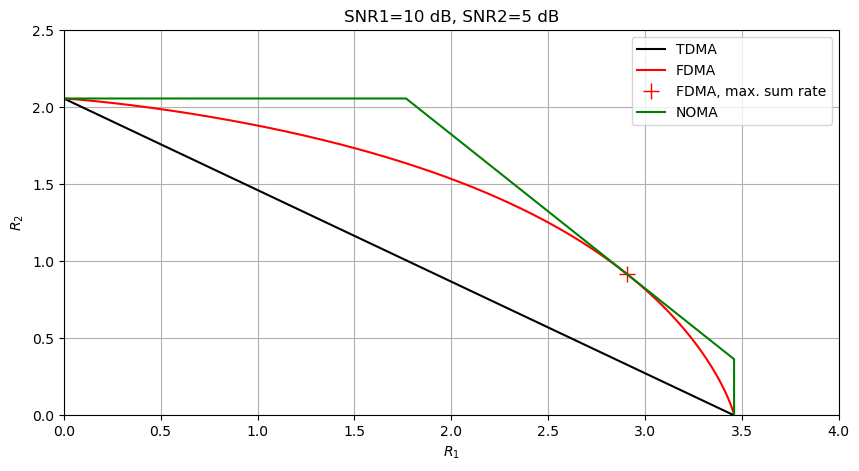

In [6]:
# ---------------------------------------------------------------------------------------------------------------------
# plotting results
# ---------------------------------------------------------------------------------------------------------------------

C1_NOMA = [0, C1_2_NOMA, C1, C1]
C2_NOMA = [C2, C2, C2_1_NOMA, 0]

fig_MAC = plt.figure(figsize=(10,5))
ax = fig_MAC.add_subplot(111)
ax.plot(Corth1_TD,Corth2_TD,'k-',label='TDMA')
ax.plot(Corth1_FD, Corth2_FD,'r-', label='FDMA')
ax.plot(sumRate_FD_max[0], sumRate_FD_max[1], 'r+', markersize=12, label='FDMA, max. sum rate')
plt.plot(C1_NOMA, C2_NOMA, 'g-', label='NOMA')
plt.grid(True)
plt.legend()
plt.xlim(0, 4)
plt.ylim(0, 2.5)
plt.xlabel('$R_1$')
plt.ylabel('$R_2$')
plt.title('SNR1=%d dB, SNR2=%d dB' %(SNR1dB, SNR2dB))